In [1]:
using PyPlot,JLD2,Statistics
include("CGS.jl")

Main.CGS

In [10]:
# include("decompose_ttvs.jl")
# include("plot_likelihood.jl")
include("corner_plot.jl")
# include("plot_emcee.jl")
include("plot_ttvs.jl")

plot_ttvs (generic function with 2 methods)

In [8]:
import Main.TTVFaster.ttv_wrapper

In [239]:
corner_hist(30.0,30.0,"EMB","p4",50,true)

In [ ]:
plot_res(10.0,30.0,"noEMB","p4",false)

### BIC calculation from fit routine

In [6]:
BIC(chi2,k,Nobs) = chi2 + k*log(Nobs)

BIC (generic function with 1 method)

In [12]:
println("BIC for p2 fits from EMB+V sims.")
println("BIC for 10s15 = ",BIC(2545,10,41))
println("BIC for 10s20 = ",BIC(3059,10,54))
println("BIC for 10s25 = ",BIC(4699,10,67))
println("BIC for 10s30 = ",BIC(4941,10,80))
println("BIC for 30s15 = ",BIC(316,10,41))
println("BIC for 30s20 = ",BIC(357,10,54))
println("BIC for 30s25 = ",BIC(590,10,67))
println("BIC for 30s30 = ",BIC(585,10,80))
println("BIC for 60s15 = ",BIC(108,10,41))
println("BIC for 60s20 = ",BIC(119,10,54))
println("BIC for 60s25 = ",BIC(201,10,67))
println("BIC for 60s30 = ",BIC(191,10,80))
println("BIC for 90s15 = ",BIC(70,10,41))
println("BIC for 90s20 = ",BIC(79,10,54))
println("BIC for 90s25 = ",BIC(127,10,67))
println("BIC for 90s30 = ",BIC(121,10,80))
println("BIC for 120s15 = ",BIC(56,10,41))
println("BIC for 120s20 = ",BIC(66,10,54))
println("BIC for 120s25 = ",BIC(101,10,67))
println("BIC for 120s30 = ",BIC(97,10,80))

BIC for p2 fits from EMB+V sims.
BIC for 10s15 = 2582.135720667043
BIC for 10s20 = 3098.889840465643
BIC for 10s25 = 4741.04692619391
BIC for 10s30 = 4984.820266346739
BIC for 30s15 = 353.1357206670431
BIC for 30s20 = 396.88984046564275
BIC for 30s25 = 632.0469261939097
BIC for 30s30 = 628.8202663467388
BIC for 60s15 = 145.13572066704307
BIC for 60s20 = 158.88984046564275
BIC for 60s25 = 243.04692619390966
BIC for 60s30 = 234.8202663467388
BIC for 90s15 = 107.13572066704307
BIC for 90s20 = 118.88984046564275
BIC for 90s25 = 169.04692619390966
BIC for 90s30 = 164.8202663467388
BIC for 120s15 = 93.13572066704307
BIC for 120s20 = 105.88984046564275
BIC for 120s25 = 143.04692619390966
BIC for 120s30 = 140.8202663467388


In [5]:
10 .^ range(log10(3*365.25),stop=log10(15*365.25),length=100)

100-element Array{Float64,1}:
 1095.7499999999998
 1113.7091362869057
 1131.9626194377613
 1150.5152737422704
 1169.3720025593416
 1188.5377896130083
 1208.0177003096082
 1227.8168830765303
 1247.940570722925 
 1268.3940818226943
 1289.182822120171 
 1310.312285958815 
 1331.7880577333467
    ⋮              
 4581.610335819358 
 4656.702066993875 
 4733.024537510566 
 4810.597918955624 
 4889.442713523761 
 4969.579759436781 
 5051.030236451046 
 5133.815671455113 
 5217.957944159217 
 5303.4792928779025
 5390.402320407525 
 5478.749999999998 

### Results

In [209]:
function print_vals(sigma,nyear,sim,model)
if String(sim)=="EMB" && isfile(string("MCMC/fromEMB/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2"))
    mcfile = string("MCMC/fromEMB/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2")
elseif isfile(string("MCMC/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2"))
    mcfile = string("MCMC/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2")
else
    return println("MCMC file for ",sim," with ",model," model at ",sigma," secs and ",nyear," yrs doesn't exist!!!!")
end
jldmc = jldopen(String(mcfile),"r")
par_mcmc,lprob_mcmc = jldmc["par_mcmc"],jldmc["lprob_mcmc"]
iburn,samples = jldmc["iburn"], jldmc["indepsamples"]
nwalkers,nsteps = jldmc["nwalkers"],jldmc["nsteps"]
param = jldmc["param"]
pname = ["mu_1","P_1","t01","ecos1","esin1",
      "mu_2","P_2","t02","ecos2","esin2",
      "mu_3","P_3","t03","ecos3","esin3", 
        "tcosϕ","tsinϕ","Δϕ","σ_sys"]
    if model=="p4"
        pname=[pname[1:15];"mu_4";"P_4";"t04";"ecos4";"esin4";pname[end]]
    end
# open(output,"w") do io
println("           Fitted posterior params from ",mcfile)
for i=1:length(param)
println(pname[i]," : ",mean(vec(par_mcmc[:,iburn:nsteps,i]))," ± ",std(vec(par_mcmc[:,iburn:nsteps,i]))) # writedlm(results,pbest_global)
end
println(pname[end]," : ",mean(vec(par_mcmc[:,iburn:nsteps,end]))," ± ",std(vec(par_mcmc[:,iburn:nsteps,end])))
println("Derived Parameters")
for i=1:length(param)
    if i%5 == 0
        println("M_p : ",mean(vec(par_mcmc[:,iburn:nsteps,i-4])).* CGS.MSUN/CGS.MEARTH," ± ",std(vec(par_mcmc[:,iburn:nsteps,i-4])).* CGS.MSUN/CGS.MEARTH)
    end     
end
println(" lprob: ",mean(vec(lprob_mcmc[iburn:nsteps]))," ± ",std(vec(lprob_mcmc[iburn:nsteps])))
end
# end

print_vals (generic function with 1 method)

In [187]:
function print_fits(sigma,nyear,sim,model,no_moon::Bool=true)
    fitfile = string("FITS/",model,"_fit",sigma,"s",nyear,"yrs.jld2")
if String(sim)=="EMB" && isfile(string("FITS/fromEMB/",model,"_fit",sigma,"s",nyear,"yrs.jld2"))
    fitfile = string("FITS/fromEMB/",model,"_fit",sigma,"s",nyear,"yrs.jld2")
elseif isfile(string("FITS/",model,"_fit",sigma,"s",nyear,"yrs.jld2"))
    fitfile=fitfile
else
    return println("FITS file for ",sim," with ",model," model at ",sigma," secs and ",nyear," yrs doesn't exist!!!!")
end

jldfit = jldopen(String(fitfile),"r")
param = jldfit["best_p3"]
lprob = jldfit["lprob_best_p3"]
pname = ["mu_1","P_1","t01","ecos1","esin1",
      "mu_2","P_2","t02","ecos2","esin2",
      "mu_3","P_3","t03","ecos3","esin3", 
        "tcosϕ","tsinϕ","Δϕ","σ_sys"]
tt0,tt,ttmodel,sigtt=jldfit["tt0"],jldfit["tt"],jldfit["ttmodel"],jldfit["sigtt"]
nplanet,ntrans = jldfit["nplanet"],jldfit["ntrans"]
nt1,nt2 = jldfit["ntrans"][1],jldfit["ntrans"][2]
# p3,lprob_p3=jldfit["p3"],jldfit["lprob_p3"]
# best_p3,lprob_best_p3=jldfit["best_p3"],jldfit["lprob_best_p3"]
Nobs = sum([nt1,nt2])
jmax=5
weight = ones(nt1+nt2)./ sigtt.^2 #assigns each data point stat weight d.t. noise = 1/σ^2
    if model=="p4"
        param = jldfit["best_p4"]
        lprob = jldfit["lprob_best_p4"]
        pname=[pname[1:15];"mu_4";"P_4";"t04";"ecos4";"esin4";pname[end]]
    end

    if sim=="nomoon" && model=="moon"
            param = jldfit["best_p3"]
            lprob = jldfit["lprob_best_p3"]
    elseif model=="moon" 
            param = jldfit["best_dp"]
            lprob = jldfit["lprob_best_dp"]
    end
# println(param)
fit = curve_fit((tt0,params) -> ttv_wrapper(tt0,nplanet,ntrans,params,jmax,no_moon),tt0,tt,weight,param)
cov = estimate_covar(fit)
pm=zeros(length(param))
    for i=1:length(param)
        for j=1:length(param)
            if i==j        
    #             println(sqrt(cov[i,j]))
                pm[i]=sqrt(cov[i,j])
            end
        end
    end
println("           Fitted params from ",fitfile)
    for i=1:length(param)
        println(pname[i]," : ",param[i]," pm ",pm[i])
    end
println("Derived Parameters")
    for i=1:length(param)
        if i%5 == 0
            println(pname[i-4]," * M_star: ",param[i-4].* CGS.MSUN/CGS.MEARTH," pm ",pm[i-4] .* CGS.MSUN/CGS.MEARTH)
        end
    end
println(" lprob: ",lprob)

return param
end

print_fits (generic function with 2 methods)

In [189]:
sigs=[10.0,30.0,60.0,90.0,120.0]
years=[30.0,25.0,20.0,15.0]
for i=1:length(sigs)
    for j=1:length(years)
        print_fits(sigs[i],years[j],"nomoon","moon")
    end
end

           Fitted params from FITS/moon_fit10.0s30.0yrs.jld2
mu_1 : 3.7289123126215386e-6 pm 6.88454846716977e-8
P_1 : 224.70077616301975 pm 1.2012124471272766e-6
t01 : 2.4335037687782003e6 pm 3.324200269231798e-5
ecos1 : -0.07694204392322318 pm 0.006023748273358285
esin1 : -0.06265537975523863 pm 0.002869633970172444
mu_2 : 2.608664024845969e-6 pm 3.9335490327345635e-8
P_2 : 365.25645891552847 pm 2.6309581280707264e-6
t02 : 2.433624407437844e6 pm 4.484492638476281e-5
ecos2 : -0.04511816215660164 pm 0.004759829176096333
esin2 : -0.04818773972024614 pm 0.0022222890524764348
mu_3 : 0.0003907609176202404 pm 2.4821392194020046e-5
P_3 : 4222.098360512293 pm 14.581979294558312
t03 : 2.4398926368598826e6 pm 38.350411999085416
ecos3 : -0.09007320902956864 pm 0.013989894583269831
esin3 : 0.12030673455053578 pm 0.012666682028115425
Derived Parameters
mu_1 * M_star: 1.2414228309764035 pm 0.022919915867100696
mu_2 * M_star: 0.868471770663293 pm 0.01309550122558071
mu_3 * M_star: 130.09142718242583

           Fitted params from FITS/moon_fit60.0s25.0yrs.jld2
mu_1 : 4.7731515609843835e-6 pm 3.0948865326120684e-7
P_1 : 224.70078903290604 pm 9.263841809384879e-6
t01 : 2.433503768482955e6 pm 0.00021479208845519458
ecos1 : -0.010904772524676656 pm 0.008517642426789821
esin1 : 0.00882554253987026 pm 0.00847940355586673
mu_2 : 2.9122482784350694e-6 pm 2.1423609078666054e-7
P_2 : 365.2564321600832 pm 1.96446322351408e-5
t02 : 2.4336244077705e6 pm 0.0002888450086889413
ecos2 : 0.007116481737472728 pm 0.007043075350933042
esin2 : 0.010249871560765157 pm 0.006297228683113479
mu_3 : 0.0013439854350511934 pm 0.00032895696025005014
P_3 : 4222.256549771791 pm 67.61024773906604
t03 : 2.4430407572722635e6 pm 112.56348817766694
ecos3 : 0.07578981309529197 pm 0.01709220848622729
esin3 : -0.04301042893073135 pm 0.013328669508372207
Derived Parameters
mu_1 * M_star: 1.5890690975650397 pm 0.10303441000372927
mu_2 * M_star: 0.9695404984675903 pm 0.07132309693137238
mu_3 * M_star: 447.4372320113186 pm 1

           Fitted params from FITS/moon_fit120.0s25.0yrs.jld2
mu_1 : 4.964973367157878e-6 pm 6.091018258820391e-7
P_1 : 224.70079625603583 pm 1.854464758805483e-5
t01 : 2.4335037682700506e6 pm 0.00042994309447738936
ecos1 : -0.01251357616110801 pm 0.01710423886079673
esin1 : 0.02085247030527001 pm 0.017215245539672037
mu_2 : 2.8142651899061513e-6 pm 4.259656959584541e-7
P_2 : 365.2564008440978 pm 3.9487550239986275e-5
t02 : 2.4336244081068696e6 pm 0.0005788004255671248
ecos2 : 0.00591060902622886 pm 0.014346166919390797
esin2 : 0.02051650962751202 pm 0.012524982681971877
mu_3 : 0.0015069387939563312 pm 0.0006432738207271224
P_3 : 4220.636857521035 pm 109.14157661692634
t03 : 2.4387510454114783e6 pm 138.1742737834132
ecos3 : 0.0859717583057202 pm 0.025644945978493313
esin3 : -0.03511226690990578 pm 0.0212221805089427
Derived Parameters
mu_1 * M_star: 1.6529300708726935 pm 0.2027810926204856
mu_2 * M_star: 0.9369201435352251 pm 0.1418117391459423
mu_3 * M_star: 501.6873733848257 pm 214.1

In [47]:
# noEMB p3 fit
286.51811746901785/25.580898139116307,
367.2036301680703 /25.247485165151122,
164.10350931574868/ 11.291188242953249,
130.09142718242583/ 8.263493582827884,
522.8694255955893 /85.5254894390676,
453.55926927822935/ 73.07918828737297,
383.4372240123339 /54.424261404953505,
116.11444905685063/ 24.80861929139411,
330.7106229224132 /78.29222438382102,
628.8271026871972 /165.37621717730522,
447.4372320113186 /109.51576401535432,
77.51773193505221 / 44.21228821232466,
479.8359684700442 /162.7544877232982, #90,25
111.08111912499405 /76.1976876266344 #90,30

(11.200471379497687, 14.54416658792291, 14.533767906859982, 15.742908961987323, 6.113609276309447, 6.206408143104647, 7.0453362914620055, 4.680407550819634, 4.224054502540793, 3.802403473850241, 4.085596589990342, 1.7533073964139068, 2.9482195863368252, 1.4578017074387748)

In [63]:
# EMB p3 fit
257.54468608440027 / 23.118585931283043,
246.3545792492353 / 21.653773236810633,
313.38050548563257 / 17.044077385178788,
277.752589357792 / 16.0912409381292,
320.8730025302503 / 70.90336672625494,
282.8508539308568 / 71.02237318174484,
315.28561811980654 / 49.85779552938495,
256.9779090836126 / 47.55279052671086,
422.09979126706605 / 138.4892912117872,
452.3153240514938 / 161.86709097231696,
301.5550689255403 / 95.77195450443158,
246.40609272012512 / 85.84947120899693,
257.2161523389397 / 125.96327011610933, #90,25
282.7126607316132 / 114.19953553525248 ,#90,30
324.86309806621546 / 145.26700623122557 #120,30

(11.140157397598538, 11.376981579840386, 18.38647516105169, 17.261104375091413, 4.525497410709463, 3.9825598788011076, 6.323697523569509, 5.404055287549648, 3.0478875844744016, 2.794362469446308, 3.1486782376524087, 2.870210954710016, 2.0419932898046014, 2.4756025443233267, 2.236317154833643)

In [44]:
# EMB p3 MCMC
423.3079925516046/115.58441644289418,
346.43436004767585/96.13362665921056,
217.2995175540921/69.5305554081773,
147.4247500570207/42.7464441314729,
368.8875836399205/205.46302478580634,
426.2671566198846/104.37272882898452,
274.8083627865666/85.72130462845047,
154.5478500823688/54.44339940471456,
287.8561056806103/101.28305318990513,#60,25
173.12207649646706/65.94523146417134,#60,30
283.5927444411752/120.36384909519005,#90,25
175.38083873020622/80.91868431796911#90,30

(3.662327548807108, 3.603675135192499, 3.1252377645833684, 3.448819031674178, 1.7953964418876973, 4.084085578698689, 3.2058350485645675, 2.8386884686150884, 2.8420954603420356, 2.6252402585094554, 2.3561289089126354, 2.1673713581531935)

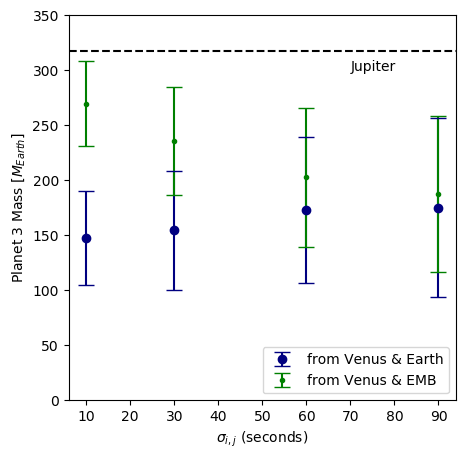

PyObject <matplotlib.legend.Legend object at 0x145761208>

In [8]:
figure(figsize=(5,5))
# ax1=subplot(121)
ax1=gca()
ax1.errorbar(10,147.4247500570207 , 42.7464441314729,fmt="o",color="navy",capsize=6,label="from Venus & Earth")
ax1.errorbar(30,154.5478500823688 , 54.44339940471456,fmt="o",color="navy",capsize=6)
ax1.errorbar(60,173.12207649646706 , 65.94523146417134,fmt="o",color="navy",capsize=6)
ax1.errorbar(90,175.38083873020622 , 80.91868431796911,fmt="o",color="navy",capsize=6)
ax1.axhline(318,linestyle="--",color="black")
# ax1.set_title("Hppp from Venus & Earth")
ax1.set_xlabel(L"$\sigma_{i,j}$ (seconds)")
# ax2=subplot(122)
ax1.errorbar(10,269.8687043482864,38.78034735184125,fmt=".",color="green",capsize=6,label="from Venus & EMB")
ax1.errorbar(30,236.05157683856774,49.32203000483943,fmt=".",color="green",capsize=6)
ax1.errorbar(60,202.89944419683977,63.32042498534476,fmt=".",color="green",capsize=6)
ax1.errorbar(90,187.75053574997204,71.21518676444603,fmt=".",color="green",capsize=6)
# ax1.axhline(318,linestyle="--",color="black")
ax1.text(70,300,"Jupiter")
# ax2.set_title("Hppp from Venus & EMB")
ax1.set_ylabel(L"Planet 3 Mass [$M_{Earth}$]")
ylim(0,350)
# ax2.set_xlabel(L"$\sigma_{i,j}$ (seconds)")
legend(loc="lower right")

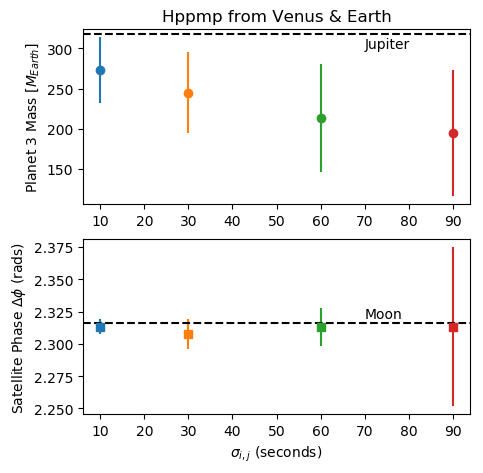

PyObject Text(0.5, 29.299999999999997, '$\\sigma_{i,j}$ (seconds)')

In [149]:
figure(figsize=(5,5))
ax1=subplot(211)
ax1.errorbar(10,272.9535736877926,40.641086846559084,fmt="o")
ax1.errorbar(30,244.63513765027557,50.32308310053471,fmt="o")
ax1.errorbar(60,212.83118609285242,67.08502610042498,fmt="o")
ax1.errorbar(90,194.25547806850247,78.28684197358848,fmt="o")
ax1.axhline(318,linestyle="--",color="black")
ax1.text(70,300,"Jupiter")
ax1.set_title("Hppmp from Venus & Earth")
ax1.set_ylabel(L"Planet 3 Mass [$M_{Earth}$]")
ax2=subplot(212)
ax2.errorbar(10,2.3133296741276808 , 0.005977725472352245,fmt="s")
ax2.errorbar(30,2.307602005712983 , 0.011761390652587115,fmt="s")
ax2.errorbar(60,2.3130485385361643 , 0.014777702454652106,fmt="s")
ax2.errorbar(90,2.3131292222282607 , 0.061604517570503795,fmt="s")
ax2.axhline(2.3159,linestyle="--",color="black")
ax2.text(70,2.32,"Moon")
ax2.set_ylabel(L"Satellite Phase $\Delta \phi$ (rads)")
ax2.set_xlabel(L"$\sigma_{i,j}$ (seconds)")

In [110]:
(2.3082561019054184 , 0.01495132095523189)
(2.312028753270602 , 0.011157691721869718)
(2.311546243821515 , 0.007476294462730386)
(2.3133296741276808 , 0.005977725472352245)
(2.340540053902154 , 0.046791514373796785)
(2.323685813184281 , 0.01813127319080505)
(2.307602005712983 , 0.011761390652587115)
(2.313487050100258 , 0.008530429940425908)
(2.3005751168885817 , 0.025962337057382746)#60,25
(2.3130485385361643 , 0.014777702454652106)#60,30
(2.3131292222282607 , 0.061604517570503795)#90,30

(23834.6542142014, 207.2138943164107, 309.183413701087, 386.99162161714025, 50.02060919004697, 128.15899847357088, 196.20145898354184, 271.2040385135324, 88.61201947281482, 156.52287936058715, 37.54804539425182)

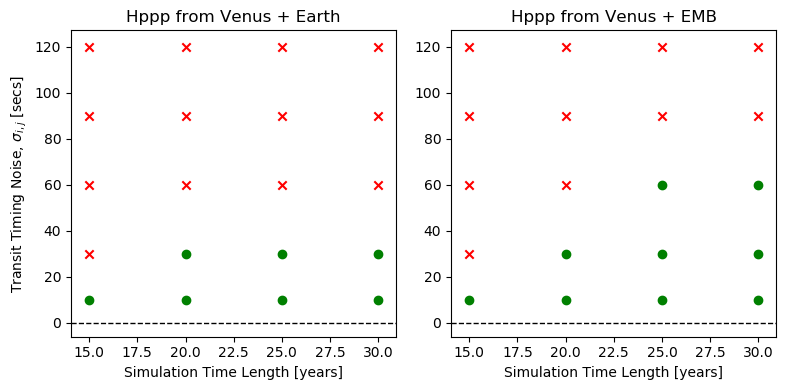

In [20]:
figure(figsize=(8,4)) 
# suptitle("Giant Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(20,10,marker="o",color="green")
ax1.scatter(25,10,marker="o",color="green")
ax1.scatter(30,10,marker="o",color="green")
ax1.scatter(15,30,marker="x",color="red")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(20,30,marker="o",color="green")
ax1.scatter(25,30,marker="o",color="green")
ax1.scatter(30,30,marker="o",color="green")
ax1.scatter(15,60,marker="x",color="red")
ax1.scatter(20,60,marker="x",color="red")
ax1.scatter(25,60,marker="x",color="red")
ax1.scatter(30,60,marker="x",color="red")
ax1.scatter(15,90,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(20,90,marker="x",color="red")
ax1.scatter(25,90,marker="x",color="red")
ax1.scatter(30,90,marker="x",color="red")
ax1.scatter(15,120,marker="x",color="red")
ax1.scatter(20,120,marker="x",color="red")
ax1.scatter(25,120,marker="x",color="red")
ax1.scatter(30,120,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_xlabel("Simulation Time Length [years]")
# ax1.text(.5,5.5,"a)")
ax1.set_title("Hppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(20,10,marker="o",color="green")
ax2.scatter(25,10,marker="o",color="green")
ax2.scatter(30,10,marker="o",color="green")
ax2.scatter(15,30,marker="x",color="red")
ax2.scatter(20,30,marker="o",color="green")
ax2.scatter(25,30,marker="o",color="green")
ax2.scatter(30,30,marker="o",color="green")
ax2.scatter(15,60,marker="x",color="red")
ax2.scatter(20,60,marker="x",color="red")
ax2.scatter(25,60,marker="o",color="green")
ax2.scatter(30,60,marker="o",color="green")
ax2.scatter(15,90,marker="x",color="red")
ax2.scatter(20,90,marker="x",color="red")
ax2.scatter(25,90,marker="x",color="red")
ax2.scatter(30,90,marker="x",color="red")
ax2.scatter(15,120,marker="x",color="red")
ax2.scatter(20,120,marker="x",color="red")
ax2.scatter(25,120,marker="x",color="red")
ax2.scatter(30,120,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
# ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_title("Hppp from Venus + EMB")
tight_layout()
show()
# make yaxis evenly spaced... dashed line at 0

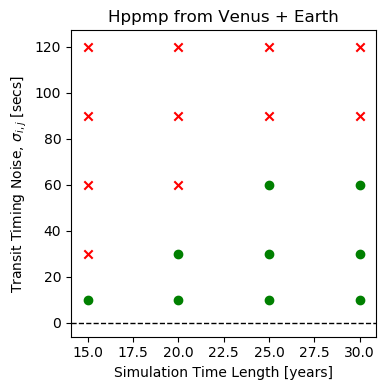

In [26]:
fig=figure(figsize=(4,4)) #Moon detections from EV times
ax3=gca()
ax3.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
# ax2.scatter(1+0.1,1,marker="o",color="green")
ax3.scatter(20,10,marker="o",color="green")
ax3.scatter(25,10,marker="o",color="green")
ax3.scatter(30,10,marker="o",color="green")
ax3.scatter(15,30,marker="x",color="red")
ax3.scatter(20,30,marker="o",color="green")
ax3.scatter(25,30,marker="o",color="green")
ax3.scatter(30,30,marker="o",color="green")
ax3.scatter(15,60,marker="x",color="red")
ax3.scatter(20,60,marker="x",color="red")
ax3.scatter(25,60,marker="o",color="green")
ax3.scatter(30,60,marker="o",color="green")
ax3.scatter(15,90,marker="x",color="red")
ax3.scatter(20,90,marker="x",color="red")
ax3.scatter(25,90,marker="x",color="red")
ax3.scatter(30,90,marker="x",color="red")
ax3.scatter(15,120,marker="x",color="red")
ax3.scatter(20,120,marker="x",color="red")
ax3.scatter(25,120,marker="x",color="red")
ax3.scatter(30,120,marker="x",color="red")
ax3.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
ax3.set_xlabel("Simulation Time Length [years]")
ax3.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
# ax2.text(.5,5.5,"b)")
ax3.set_title("Hppmp from Venus + Earth")
tight_layout()
show()

In [ ]:
figure(figsize=(8,4)) 
title("Terrestrial Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(2,1,marker="o",color="green")
ax1.scatter(3,1,marker="o",color="green")
ax1.scatter(4,1,marker="o",color="green")
ax1.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(2,2,marker="o",color="green")
ax1.scatter(3,2,marker="o",color="green")
ax1.scatter(4,2,marker="o",color="green")
ax1.scatter(1,3,marker="o",color="green")
ax1.scatter(2,3,marker="o",color="green")
ax1.scatter(3,3,marker="o",color="green")
ax1.scatter(4,3,marker="x",color="red")
ax1.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(2,4,marker="x",color="red")
ax1.scatter(3,4,marker="x",color="red")
ax1.scatter(4,4,marker="x",color="red")
ax1.scatter(1,5,marker="x",color="red")
ax1.scatter(2,5,marker="x",color="red")
ax1.scatter(3,5,marker="x",color="red")
ax1.scatter(4,5,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_xlabel("Simulation Time Length [years]")
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_title("Hpppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(2,1,marker="o",color="green")
ax2.scatter(3,1,marker="o",color="green")
ax2.scatter(4,1,marker="o",color="green")
ax2.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax2.scatter(2,2,marker="o",color="green")
ax2.scatter(3,2,marker="o",color="green")
ax2.scatter(4,2,marker="o",color="green")
ax2.scatter(1,3,marker="o",color="green")
ax2.scatter(2,3,marker="x",color="red")
ax2.scatter(3,3,marker="o",color="green")
ax2.scatter(4,3,marker="x",color="red")
ax2.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax2.scatter(2,4,marker="x",color="red")
ax2.scatter(3,4,marker="x",color="red")
ax2.scatter(4,4,marker="x",color="red")
ax2.scatter(1,5,marker="x",color="red")
ax2.scatter(2,5,marker="x",color="red")
ax2.scatter(3,5,marker="x",color="red")
ax2.scatter(4,5,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_title("Hppp from Venus + EMB")
# ax1.legend()
tight_layout()
show()

Loading...MCMC/p4_mcmc10.0s30.0yrs.jld2 and FITS/p4_fit10.0s30.0yrs.jld2
Loading...MCMC/p4_mcmc10.0s25.0yrs.jld2 and FITS/p4_fit10.0s25.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 10.0 secs and 20.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc10.0s15.0yrs.jld2 and FITS/p4_fit10.0s15.0yrs.jld2
Loading...MCMC/p4_mcmc30.0s30.0yrs.jld2 and FITS/p4_fit30.0s30.0yrs.jld2
Loading...MCMC/p4_mcmc30.0s25.0yrs.jld2 and FITS/p4_fit30.0s25.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 30.0 secs and 20.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 30.0 secs and 15.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc60.0s30.0yrs.jld2 and FITS/p4_fit60.0s30.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 60.0 secs and 25.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 60.0 secs and 20.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc60.0s15.0yrs.jld2 and FITS/p4_fit60.0s15.0yrs.jld2
MCMC or FITS file for 

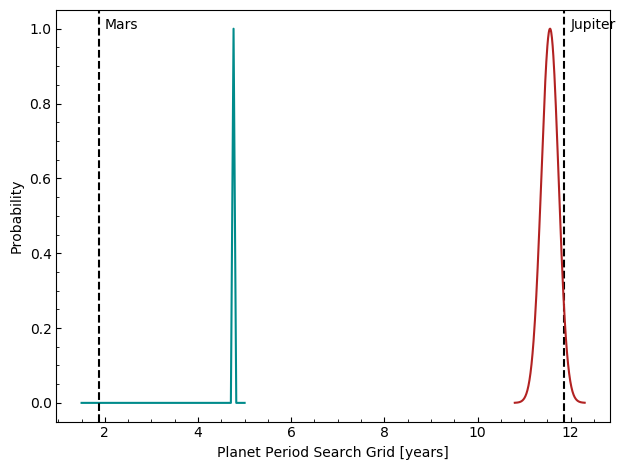

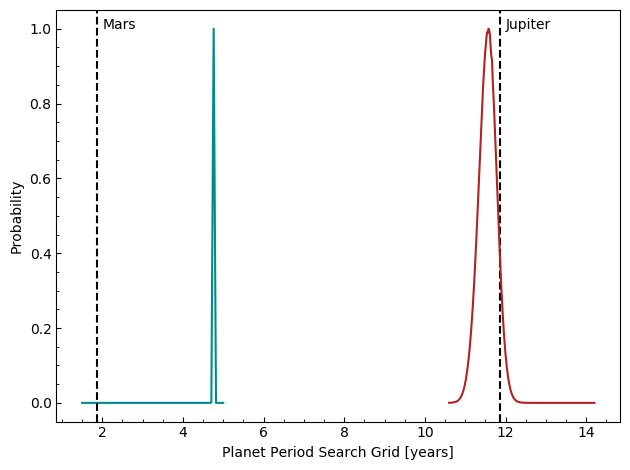

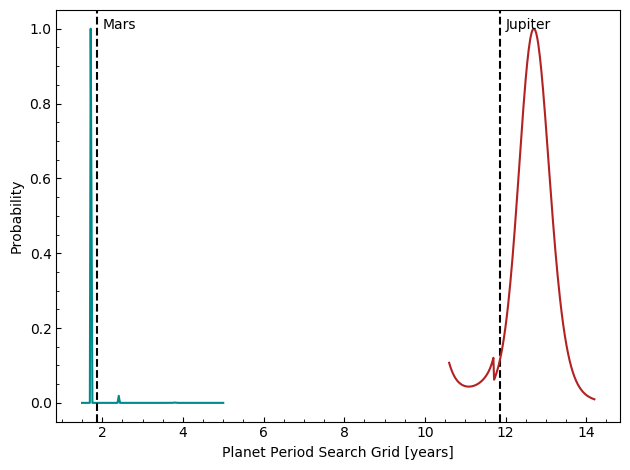

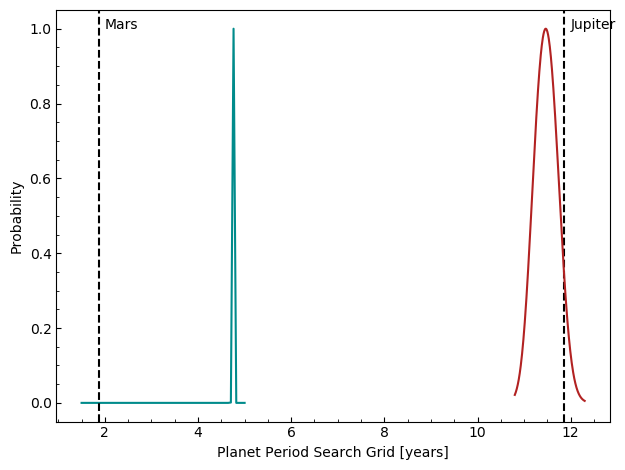

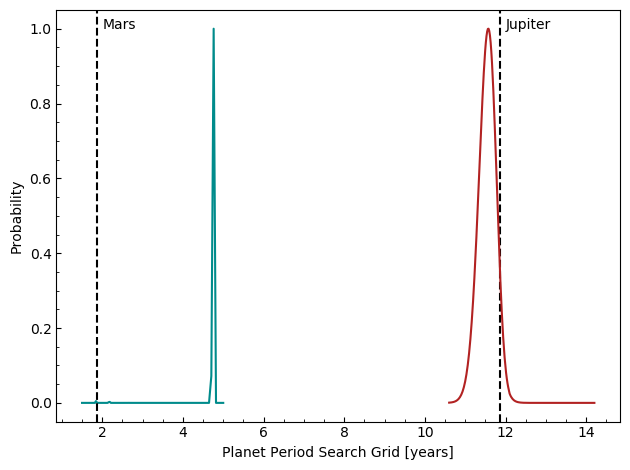

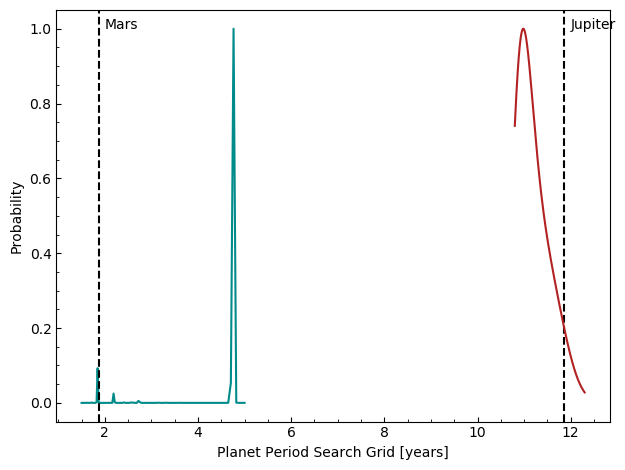

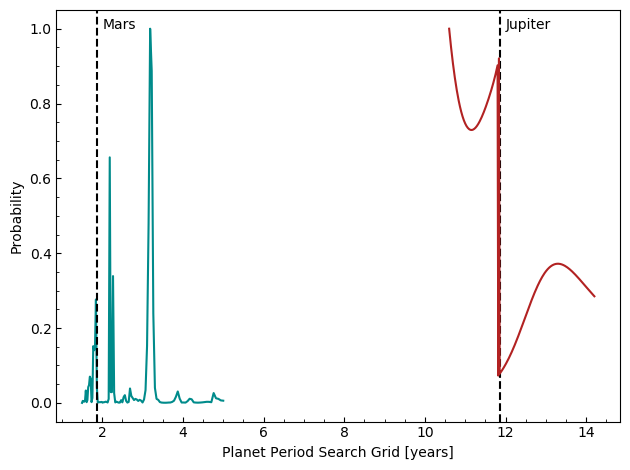

noEMB with p4 model at 90.0 secs and 30.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 25.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 20.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 15.0 yrs doesn't exist!!!!


In [199]:
# include("plot_emcee.jl")
# include("corner_plot.jl")
include("plot_likelihood.jl")
# include("plot_ttvs.jl")
sigs=[10.0,30.0,60.0,90.0]#,120.0]
years=[30.0,25.0,20.0,15.0]
for i=1:length(sigs)
    for j=1:length(years)
# plot_emcee(sigs[i],years[j],"noEMB","moon",true)
# corner_plot(sigs[i],years[j],"noEMB","moon",50,true) #still need to run moon true
plot_likelihood(sigs[i],years[j],"noEMB","p4","p4",50) 
# plot_ttvs(sigs[i],years[i],"EMB","p3",false) 
    end
end

### Added M_p > 0 prior to MCMC.jl

In [222]:
# p_mc615 = jldopen("MCMC/fromEMB/p3_mcmc60.0s15.0yrs.jld2","r");
print_vals(60.0,20.0,"EMB","p3")

           Fitted posterior params from MCMC/fromEMB/p3_mcmc60.0s20.0yrs.jld2
mu_1 : 2.2953593843779123e-6 ± 5.65505427643049e-7
P_1 : 224.7007316560566 ± 9.31800554259171e-5
t01 : 2.4335037660146244e6 ± 0.0014955794907044765
ecos1 : -0.0014922584537901242 ± 0.033469401760086025
esin1 : 0.009845991564943053 ± 0.027320955750814422
mu_2 : 2.7740129553714868e-6 ± 4.045974296299554e-7
P_2 : 365.25613166605433 ± 0.0004488733618602683
t02 : 2.4336244052444217e6 ± 0.0042164346374832925
ecos2 : 0.01077475847435922 ± 0.027157831927570496
esin2 : 0.00757934677031316 ± 0.02153385955533255
mu_3 : 5.218389161595334e9 ± 3.6603527226993965e10
P_3 : 1.419785797995382e17 ± 6.131168581795427e17
t03 : 1.459965420525935e17 ± 2.0023541166629586e18
ecos3 : -0.02014546537552967 ± 0.08494595472723777
esin3 : 0.01026679976755268 ± 0.07934702490153349
σ_sys : 5.536564842758434e-7 ± 4.0027231724116406e-7
Derived Parameters
M_p : 0.7641669490102302 ± 0.18826705753871864
M_p : 0.9235194414645403 ± 0.13469785406240

In [224]:
plot_emcee(60.0,20.0,"EMB","p3")

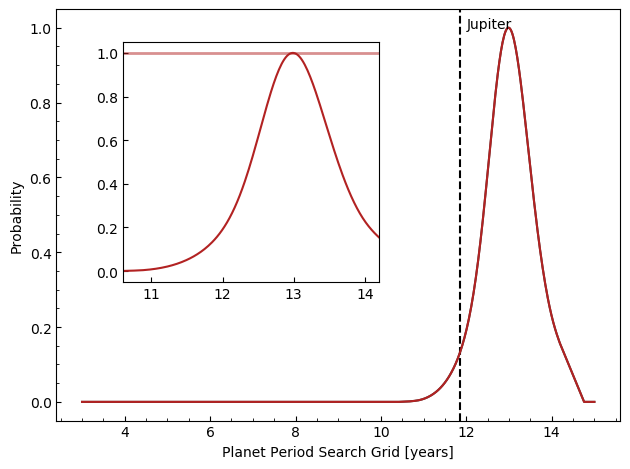

In [223]:
plot_likelihood(60.0,20.0,"EMB","p3","p3",500)

### Linear Fit to Posterior mean and/or std

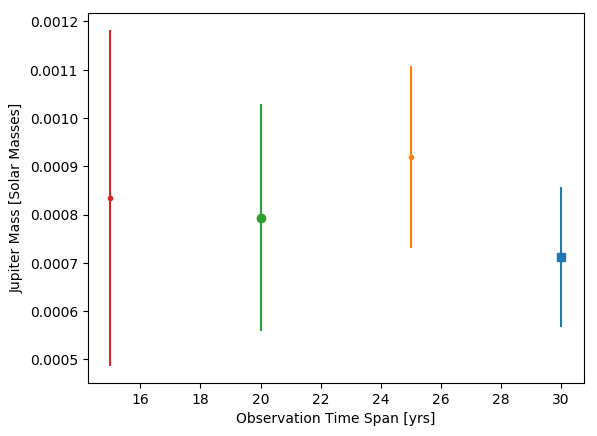

PyObject Text(24.000000000000014, 0.5, 'Jupiter Mass [Solar Masses]')

In [32]:
plot_col(11)
ylabel("Jupiter Mass [Solar Masses]")

In [154]:
sqrt(0.26456289315602766^2 + 0.010912818973584851^2)

0.2647878661363431

### 2-planet MCMC

In [20]:
include("MCMC.jl")

MCMC (generic function with 1 method)

In [21]:
1-sum(m_33["ntrans"][1:2] )/2 * log(667.8479408806473)
# Nobs = sum()

-259.1624205684809

In [23]:
MCMC("MCMC/p2_mcmc30.0s30.0yrs.jld2",[4.513519229108455e-6, 224.70077801541302, 2.4335037687537777e6, -0.0175050266179791, -0.025801638584714393, 2.964754129377914e-6, 365.25643897142635, 2.4336244077652446e6, 0.003030566580559538, -0.01953468392084722],
    -259.1624205684809,10000,50,2,m_33["ntrans"][1:2],m_33["tt0"],m_33["tt"],m_33["sigtt"],true,true)

Parameters from fit: [4.513519229108455e-6, 224.70077801541302, 2.4335037687537777e6, -0.0175050266179791, -0.025801638584714393, 2.964754129377914e-6, 365.25643897142635, 2.4336244077652446e6, 0.003030566580559538, -0.01953468392084722]
Maximum log Prob from fit: -259.1624205684809
Step: 193 Walker: 42 Trial Log Prob: 426.49314303794404 Prob: 1.2710845222989337e-7 Frac: 0.4260526861646961
Step: 293 Walker: 34 Trial Log Prob: 473.82203892999183 Prob: 1.005490785208814 Frac: 0.4230558972256389
Step: 370 Walker: 49 Trial Log Prob: 493.2463334225217 Prob: 0.25319213944931385 Frac: 0.4233201794691605
Step: 572 Walker: 36 Trial Log Prob: 517.5322863903355 Prob: 0.001594701592098923 Frac: 0.40918631497936053
Step: 584 Walker: 35 Trial Log Prob: 513.5953264857309 Prob: 0.4843221013987992 Frac: 0.4091485352064417
Step: 608 Walker: 46 Trial Log Prob: 518.8336758842289 Prob: 0.07254184825454627 Frac: 0.4077839189367022
Number of steps: 1000 Acceptance Rate: 0.39362
Step: 1001 Walker: 10 Trial Lo

([75.28769233479389 219.3594460186767 … 516.4881994945473 516.4881994945473; -444.65886672058883 -179.91995136093811 … 518.9664783752439 518.9664783752439; … ; -6.207035479125622 8.101604707805357 … 515.0457994095664 516.7171326214575; -590.5867961707044 -590.5867961707044 … 516.3621801274104 514.7776681213268], [4.445630411721898e-6 4.415787023431983e-6 … 4.206582338987755e-6 4.206582338987755e-6; 4.422629575203517e-6 4.434748781693544e-6 … 4.668535978959624e-6 4.668535978959624e-6; … ; 4.421228165235299e-6 4.487950235042027e-6 … 5.371583333236327e-6 5.212825825179325e-6; 4.358749104252416e-6 4.358749104252416e-6 … 4.278023225622351e-6 4.2086541016973845e-6]

[224.700772340187 224.7007758152718 … 224.70077643355427 224.70077643355427; 224.7007664603429 224.700765708711 … 224.70077526896767 224.70077526896767; … ; 224.7007948253631 224.7007858316187 … 224.70077304449623 224.70077747636677; 224.70077991916642 224.70077991916642 … 224.70078876795066 224.70079300411328]

[2.43350376875570